<h1><font color='blue'>Problem 1A)</font><h1>
    

In [13]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
#import dataset
MainData = pd.read_csv("train.csv")
saleprice = pd.DataFrame(MainData['SalePrice']) #Response
area = pd.DataFrame(MainData['GrLivArea']) #Predictor
MainData.head()
print("Data dims : ", MainData.shape)

Data dims :  (1460, 81)


In [15]:
mse = mean_squared_error
train_area, test_area, train_saleprice, test_saleprice = train_test_split(area, saleprice, test_size = 0.2)
# Check the sample sizes
print("Train Set :", train_area.shape,train_saleprice.shape)
print("Test Set  :", test_area.shape, test_saleprice.shape)



Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


Intercept of Regression:	: b =  [22917.5722061]
Coefficients of Regression:	: a =  [[104.09450858]]

Train Set - Explained Variance (R^2)	: 0.5027483478111467

Test Set Metrics
Mean Squared Error (MSE) 	: 3471380073.2399745
Root Mean Squared Error (RMSE) 	: 58918.41879446507



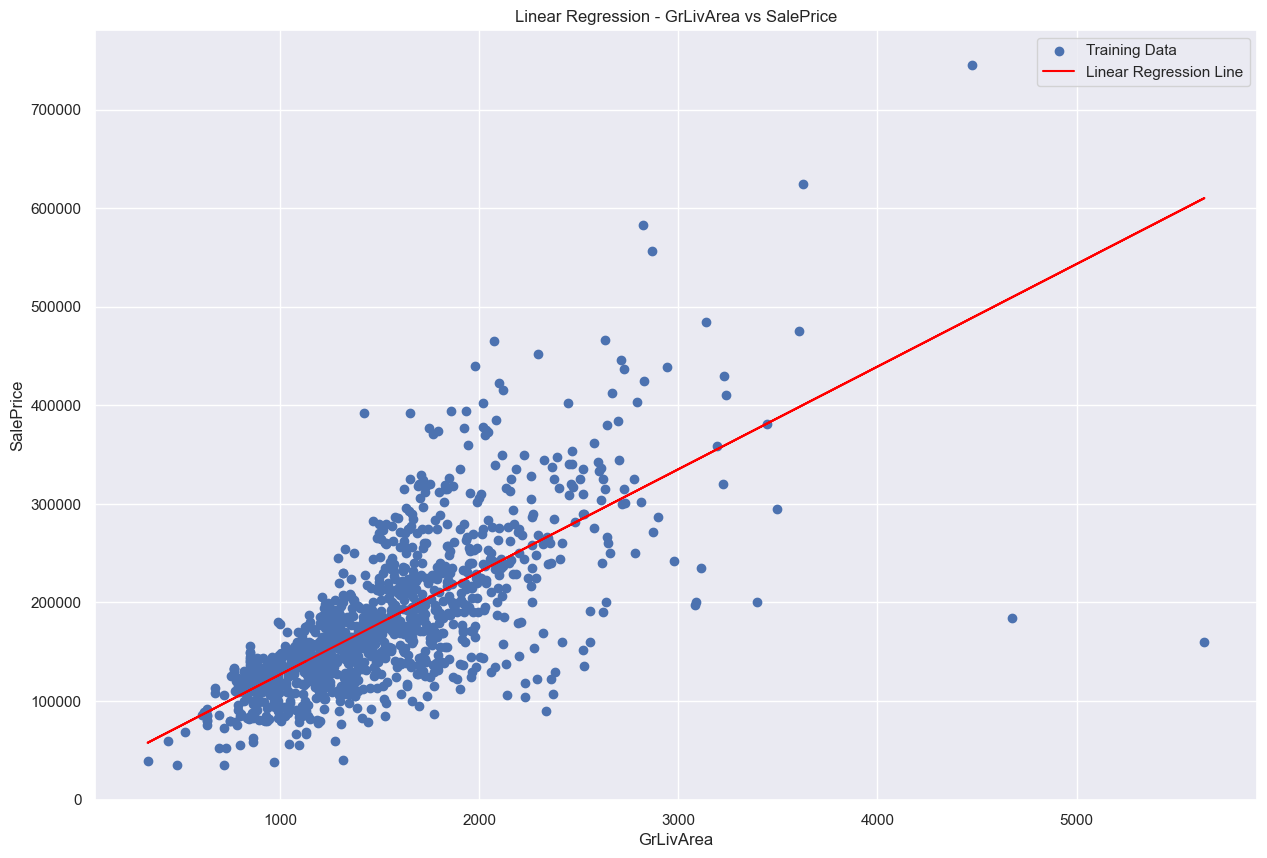

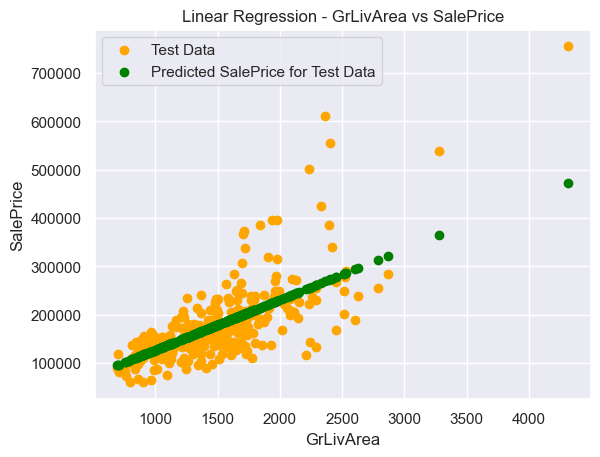

In [19]:
mse = mean_squared_error
train_area, test_area, train_saleprice, test_saleprice = train_test_split(area, saleprice, test_size = 0.2)

linreg = LinearRegression() # Create a Linear Regression object
linreg.fit(train_area, train_saleprice) # Train the Linear Regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression:\t: b = ', linreg.intercept_)
print('Coefficients of Regression:\t: a = ', linreg.coef_)
print()

# Predict Saleprice values corresponding to GrLivArea
saleprice_train_pred = linreg.predict(train_area)
saleprice_test_pred = linreg.predict(test_area)

# Explained Variance(R^2) & Mean Square Error <- test set
print("Train Set - Explained Variance (R^2)\t:", linreg.score(train_area,train_saleprice))
print()
print("Test Set Metrics")
print("Mean Squared Error (MSE) \t:", mse(test_saleprice, saleprice_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse(test_saleprice, saleprice_test_pred)))
print()

# Plot the Linear Regression Line
f = plt.figure(figsize=(15,10))

plt.scatter(train_area, train_saleprice, label='Training Data')
plt.plot(train_area, saleprice_train_pred, color='red', label='Linear Regression Line')

plt.title('Linear Regression - GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(test_area, test_saleprice, color='orange', label='Test Data')
plt.scatter(test_area, saleprice_test_pred, color='green', label='Predicted SalePrice for Test Data')
plt.title('Linear Regression - GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.grid(True)
plt.show()


<h3>Solutions to Problem 1A)<h3>

<h3> b =  [22917.5722061]
 a =  [[104.09450858]]]<h3>

<h1><font color='blue'>Problem 1B)</font><h1>

In [18]:
# Explained Variance (R^2) score gives
print("Train data:")
print("Explained Variance (R^2) \t:", linreg.score(train_area, train_saleprice))

# Mean Squared Error (MSE) 
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(train_saleprice, saleprice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
print("\t")
print("Test data:")
print("Explained Variance (R^2) \t:", linreg.score(test_area, test_saleprice))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(test_saleprice, saleprice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))#your code here

Train data:
Explained Variance (R^2) 	: 0.4806992203394309
Mean Squared Error (MSE) 	: 3173344355.7022686
Root Mean Squared Error (RMSE) 	: 56332.44496471166
	
Test data:
Explained Variance (R^2) 	: 0.5734523301093792
Mean Squared Error (MSE) 	: 3024532317.103101
Root Mean Squared Error (RMSE) 	: 54995.74817295516


<h3>Solutions to Problem 1B)<h3>
    <h3>We predict goodness of fit of model on Train set and Predict Accuracy of model on Test set using Mean squared error and Explained Variance(R^2)<h3>
        <h3>The smaller the Mean Squared Error(MSE) in test better model it is and higher the Explaine variance(R^2) the better model it is.Test data fulfills the above mentioned data<h3>

<h1><font color='blue'>Problem 2)</font><h1>

In [75]:
X = MainData['GrLivArea'].values.reshape(-1, 1)  # Feature matrix
y = MainData['SalePrice'].values.reshape(-1, 1)   # Target variable

TotalBsmtSF vs Sale Price
Coefficients (TotalBsmtSF): [[104.8060222]]
Intercept (TotalBsmtSF): [70161.50459652]

Goodness of Fit - Training Set (TotalBsmtSF)
RMSE: 61913.43299104736
R^2 Score: 0.35732403271537017

Prediction Accuracy - Test Set (TotalBsmtSF)
RMSE: 66084.41263716131
R^2 Score: 0.4306435638282802


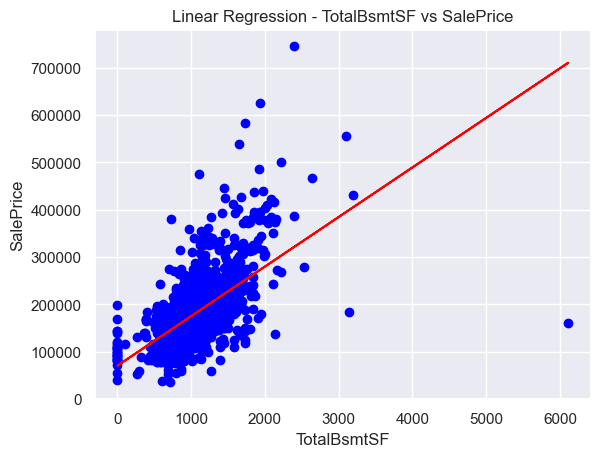

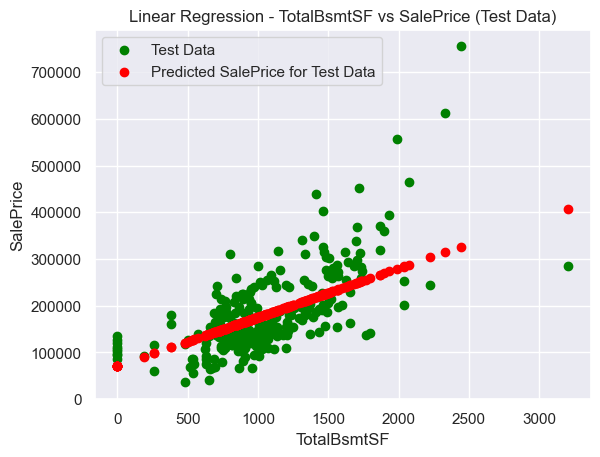

In [80]:
print("TotalBsmtSF vs Sale Price")

# For TotalBsmtSF
X_total_bsmt_sf = MainData['TotalBsmtSF'].values.reshape(-1, 1)

# Split the data
X_train_bsmt, X_test_bsmt, y_train_bsmt, y_test_bsmt = train_test_split(X_total_bsmt_sf, y, test_size=0.2, random_state=42)

# Fit linear regression model for TotalBsmtSF
lr_bsmt = LinearRegression()
lr_bsmt.fit(X_train_bsmt, y_train_bsmt)

# Print the coefficients
print("Coefficients (TotalBsmtSF):", lr_bsmt.coef_)
print("Intercept (TotalBsmtSF):", lr_bsmt.intercept_)

# Goodness of Fit on the training set for TotalBsmtSF
y_train_pred_bsmt = lr_bsmt.predict(X_train_bsmt)
train_rmse_bsmt = np.sqrt(mean_squared_error(y_train_bsmt, y_train_pred_bsmt))
train_r2_bsmt = r2_score(y_train_bsmt, y_train_pred_bsmt)
print("\nGoodness of Fit - Training Set (TotalBsmtSF)")
print("RMSE:", train_rmse_bsmt)
print("R^2 Score:", train_r2_bsmt)

# Prediction accuracy on the test set for TotalBsmtSF
y_test_pred_bsmt = lr_bsmt.predict(X_test_bsmt)
test_rmse_bsmt = np.sqrt(mean_squared_error(y_test_bsmt, y_test_pred_bsmt))
test_r2_bsmt = r2_score(y_test_bsmt, y_test_pred_bsmt)
print("\nPrediction Accuracy - Test Set (TotalBsmtSF)")
print("RMSE:", test_rmse_bsmt)
print("R^2 Score:", test_r2_bsmt)

# Plotting the regression line for TotalBsmtSF
plt.scatter(X_train_bsmt, y_train_bsmt, color='blue')
plt.plot(X_train_bsmt, lr_bsmt.predict(X_train_bsmt), color='red')
plt.title('Linear Regression - TotalBsmtSF vs SalePrice')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()


# Predict SalePrice values for the test set for TotalBsmtSF
y_test_pred_bsmt = lr_bsmt.predict(X_test_bsmt)

# Plotting the predictions for the test set for TotalBsmtSF
plt.scatter(X_test_bsmt, y_test_bsmt, color='green', label='Test Data')
plt.scatter(X_test_bsmt, y_test_pred_bsmt, color='red', label='Predicted SalePrice for Test Data')
plt.title('Linear Regression - TotalBsmtSF vs SalePrice (Test Data)')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.legend()
plt.show()





Garage Area vs Sale Price

Coefficients (GarageArea): [[228.44274774]]
Intercept (GarageArea): [72640.20697413]

Goodness of Fit - Training Set (GarageArea)
RMSE: 60341.22698316328
R^2 Score: 0.38954934705845656

Prediction Accuracy - Test Set (GarageArea)
RMSE: 68673.90532347778
R^2 Score: 0.385149321555714


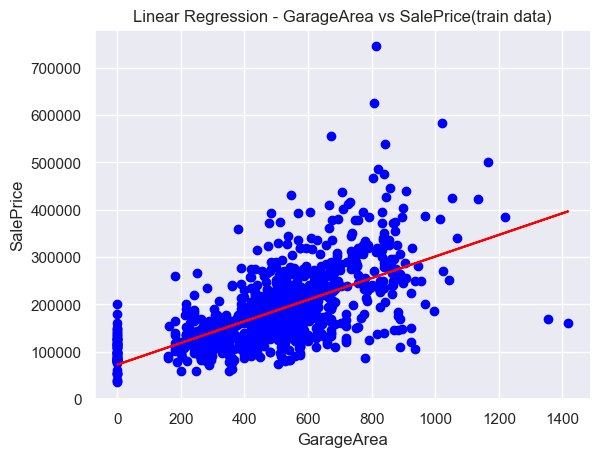

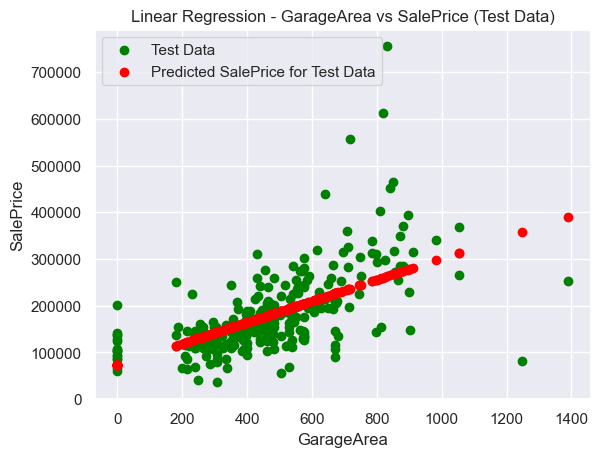

In [77]:
print("Garage Area vs Sale Price")
# For GarageArea
X_garage_area = MainData['GarageArea'].values.reshape(-1, 1)

# Split the data
X_train_bsmt, X_test_bsmt, y_train_bsmt, y_test_bsmt = train_test_split(X_total_bsmt_sf, y, test_size=0.2, random_state=42)

# Fit linear regression model for GarageArea
lr_garage = LinearRegression()
lr_garage.fit(X_train_garage, y_train_garage)

# Print the coefficients
print("\nCoefficients (GarageArea):", lr_garage.coef_)
print("Intercept (GarageArea):", lr_garage.intercept_)

# Goodness of Fit on the training set for GarageArea
y_train_pred_garage = lr_garage.predict(X_train_garage)
train_rmse_garage = np.sqrt(mean_squared_error(y_train_garage, y_train_pred_garage))
train_r2_garage = r2_score(y_train_garage, y_train_pred_garage)
print("\nGoodness of Fit - Training Set (GarageArea)")
print("RMSE:", train_rmse_garage)
print("R^2 Score:", train_r2_garage)

# Prediction accuracy on the test set for GarageArea
y_test_pred_garage = lr_garage.predict(X_test_garage)
test_rmse_garage = np.sqrt(mean_squared_error(y_test_garage, y_test_pred_garage))
test_r2_garage = r2_score(y_test_garage, y_test_pred_garage)
print("\nPrediction Accuracy - Test Set (GarageArea)")
print("RMSE:", test_rmse_garage)
print("R^2 Score:", test_r2_garage)

# Plotting the regression line for GarageArea
plt.scatter(X_train_garage, y_train_garage, color='blue')
plt.plot(X_train_garage, lr_garage.predict(X_train_garage), color='red')
plt.title('Linear Regression - GarageArea vs SalePrice(train data)')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

# Predict SalePrice values for the test set for GarageArea
y_test_pred_garage = lr_garage.predict(X_test_garage)

# Plotting the predictions for the test set for GarageArea
plt.scatter(X_test_garage, y_test_garage, color='green', label='Test Data')
plt.scatter(X_test_garage, y_test_pred_garage, color='red', label='Predicted SalePrice for Test Data')
plt.title('Linear Regression - GarageArea vs SalePrice (Test Data)')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

<h3>Solutions to Problem 2)<h3>
<h3>Since RMSE measures the average deviation of the predicted values from the actual values, the lower the value, the better the predictive performance. It's R^2 Score is also closer to 1 which makes it a better fit. Comparing the MSE and R^2 we got from the 3 models(GrLivArea,TotalBsmtSF,GarageArea) The Means squared Error(MSE) is lowest for GrLivArea also Explained variance(R^2) is highest for GrLivArea so GrLivArea is best for predicting SalePrice<h3>

<h1><font color='blue'>Problem 3A)</font><h1>

In [22]:
combined_data = MainData[["GrLivArea", "SalePrice"]]

<Axes: >

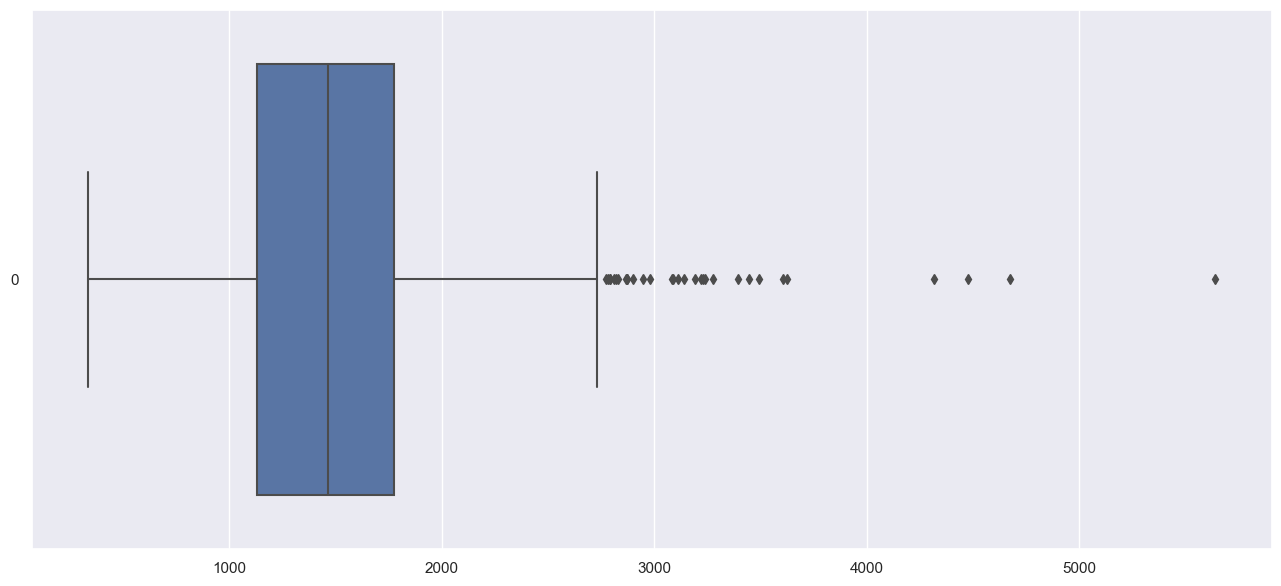

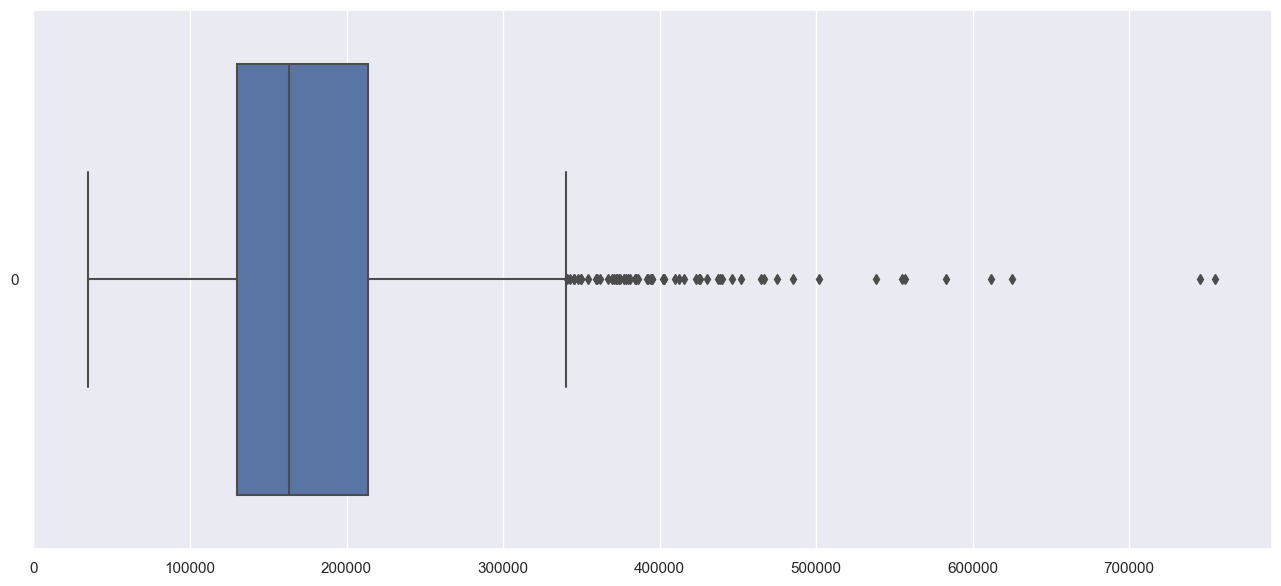

In [23]:
f = plt.figure(figsize=(16,7))
sb.boxplot(data = MainData["GrLivArea"] , orient = "h")
f = plt.figure(figsize=(16,7))
sb.boxplot(data = MainData["SalePrice"] , orient = "h")

In [24]:
q1=MainData['GrLivArea'].quantile(0.25)
q3=MainData['GrLivArea'].quantile(0.75)
r=q3-q1
print("Number of outliers(GrLivArea):")
outliers=((MainData['GrLivArea']<(q1- 1.5*r))| (MainData['GrLivArea']>(q3+ 1.5*r)))
outliers.sum()


Number of outliers(GrLivArea):


31

In [25]:
q1=MainData['SalePrice'].quantile(0.25)
q3=MainData['SalePrice'].quantile(0.75)
r=q3-q1
print("Number of outliers(SalePrice):")
outliers2=((MainData['SalePrice']<(q1- 1.5*r))| (MainData['SalePrice']>(q3+ 1.5*r)))
outliers2.sum()

Number of outliers(SalePrice):


61

In [26]:
outliers3=outliers|outliers2
outliers3.sum() #only taking out common outliers

77

In [28]:
MainData = MainData[~outliers3]
print("Data dims : ",MainData.shape)

Data dims :  (1383, 81)


C:\Users\arunk\AppData\Local\Temp\ipykernel_20212\1762245042.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MainData = MainData[~outliers3]


<h3>Solutions to Problem 3A)<h3>
    <h3>From the above we can see that we have removed the outliers. We need to take note that there are some outliers that are common in both the dataset. The total number of outliers from GrLivArea and SalePrice is 77, but individually GrLivArea and saleprice have 31 and 61 outliers respectively<h3>

<h1><font color='blue'>Problem 3B)</font><h1>

In [89]:
Saleprice=pd.DataFrame(MainData['SalePrice'])
GrLivArea=pd.DataFrame(MainData['GrLivArea'])
train_livarea,test_livarea,train_saleprice,test_saleprice= train_test_split(GrLivArea,Saleprice,test_size=0.2)


In [90]:
linreg = LinearRegression()
linreg.fit(train_livarea, train_saleprice)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [32108.88944306]
Coefficients 	: a =  [[93.91875472]]


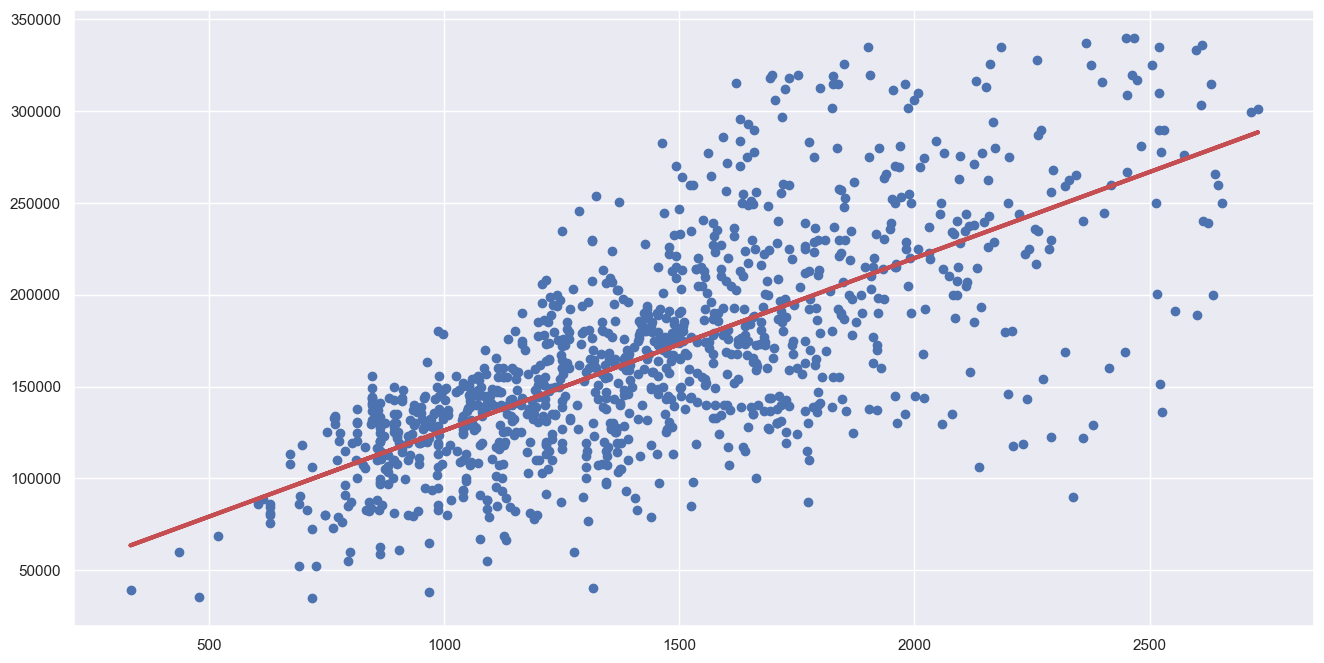

In [91]:
regline_x=train_livarea
regline_y=linreg.intercept_ + linreg.coef_ * train_livarea

#Plot the linear Regression line
f,axes=plt.subplots(1,1,figsize=(16,8))
plt.scatter(train_livarea,train_saleprice)
plt.plot(regline_x,regline_y,'r-',linewidth=3)#regression line
plt.show()



<h3>Solutions to Problem 3B)<h3>
    <h3>The model coefficients and regression line are plotted above</h3>


<h1><font color='blue'>Problem 3C)</font><h1>

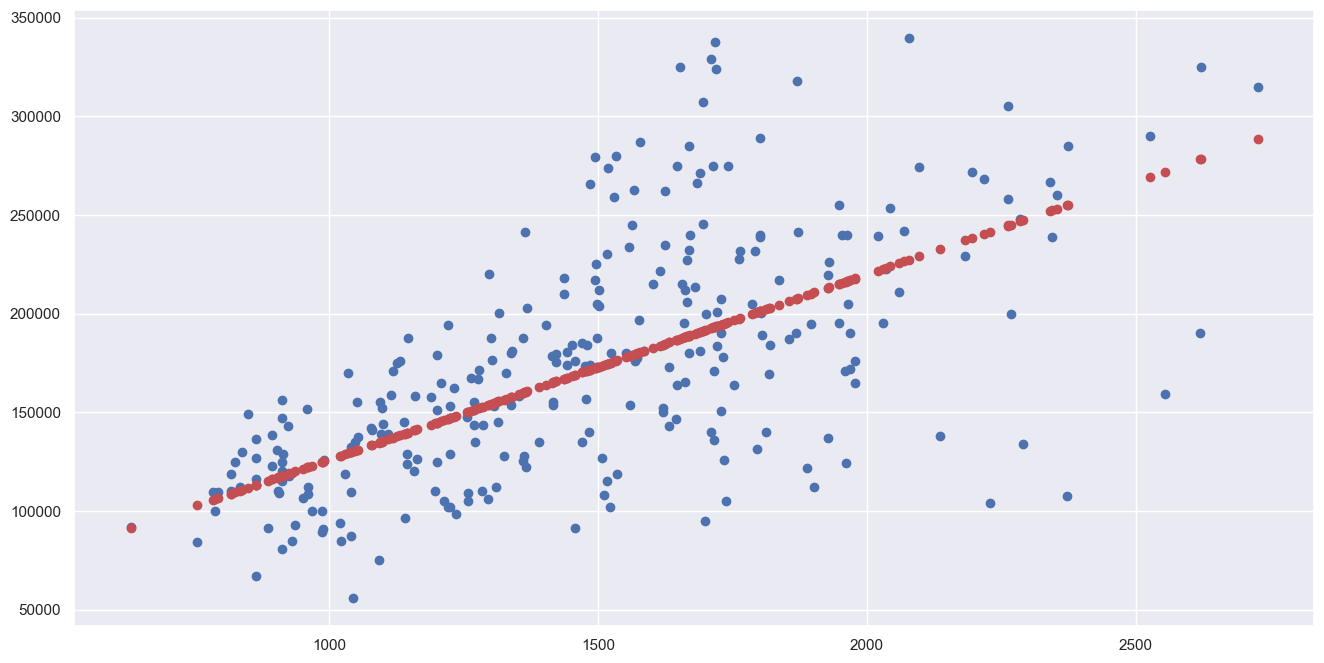

In [92]:
saleprice_test_pred = linreg.predict(test_livarea)
f = plt.figure(figsize=(16, 8))
plt.scatter(test_livarea, test_saleprice)
plt.scatter(test_livarea, saleprice_test_pred,color="r")
plt.show()

In [93]:
regline_gr_pred = test_livarea
regline_sale_pred = linreg.intercept_ + linreg.coef_ * test_livarea

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(test_livarea, test_saleprice))
print("Mean Squared Error (MSE) \t:", mean_squared_error(regline_gr_pred, regline_sale_pred))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3897891764263909
Mean Squared Error (MSE) 	: 30326600928.026817



<h3>Solutions to Problem 3C)<h3>
    <h3>The smaller the Mean Squared Error(MSE) in test better model it is and higher the Explaine variance(R^2) the better model it is.
  
        From the model we used in Problem 1 MSE and R^2 on test is:
        Explained Variance (R^2) 	: 0.5734523301093792
        Mean Squared Error (MSE) 	: 3024532317.103101
        
        From the model we used in Problem 3 MSE and R^2 on test is:
        Explained Variance (R^2) 	: 0.3897891764263909
        Mean Squared Error (MSE) 	: 30326600928.026817
        
        
        
        
        So in my case,this shows that the model with outliers(Problem 1) is still sligtly better than model without outliers (Problem 3)<h3>